# Neural & Behavioral Modeling - Week 9 (Exercises)
by 劉昱維 (r08227111@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 A Two-layered Linear Network as a Regression Model (7 points)
Data fitting of the following network is poor. Please check if adding bias terms or chaging network hyperparameters (e.g., learning rate, amount of training, etc.) help. If not, please explain why the fitting is poor given that the network/regression model has sufficient degrees of freedom (i.e., network weights or regression coefficients) to overfit such a small data set.

# 目的：找出為何學不好的原因


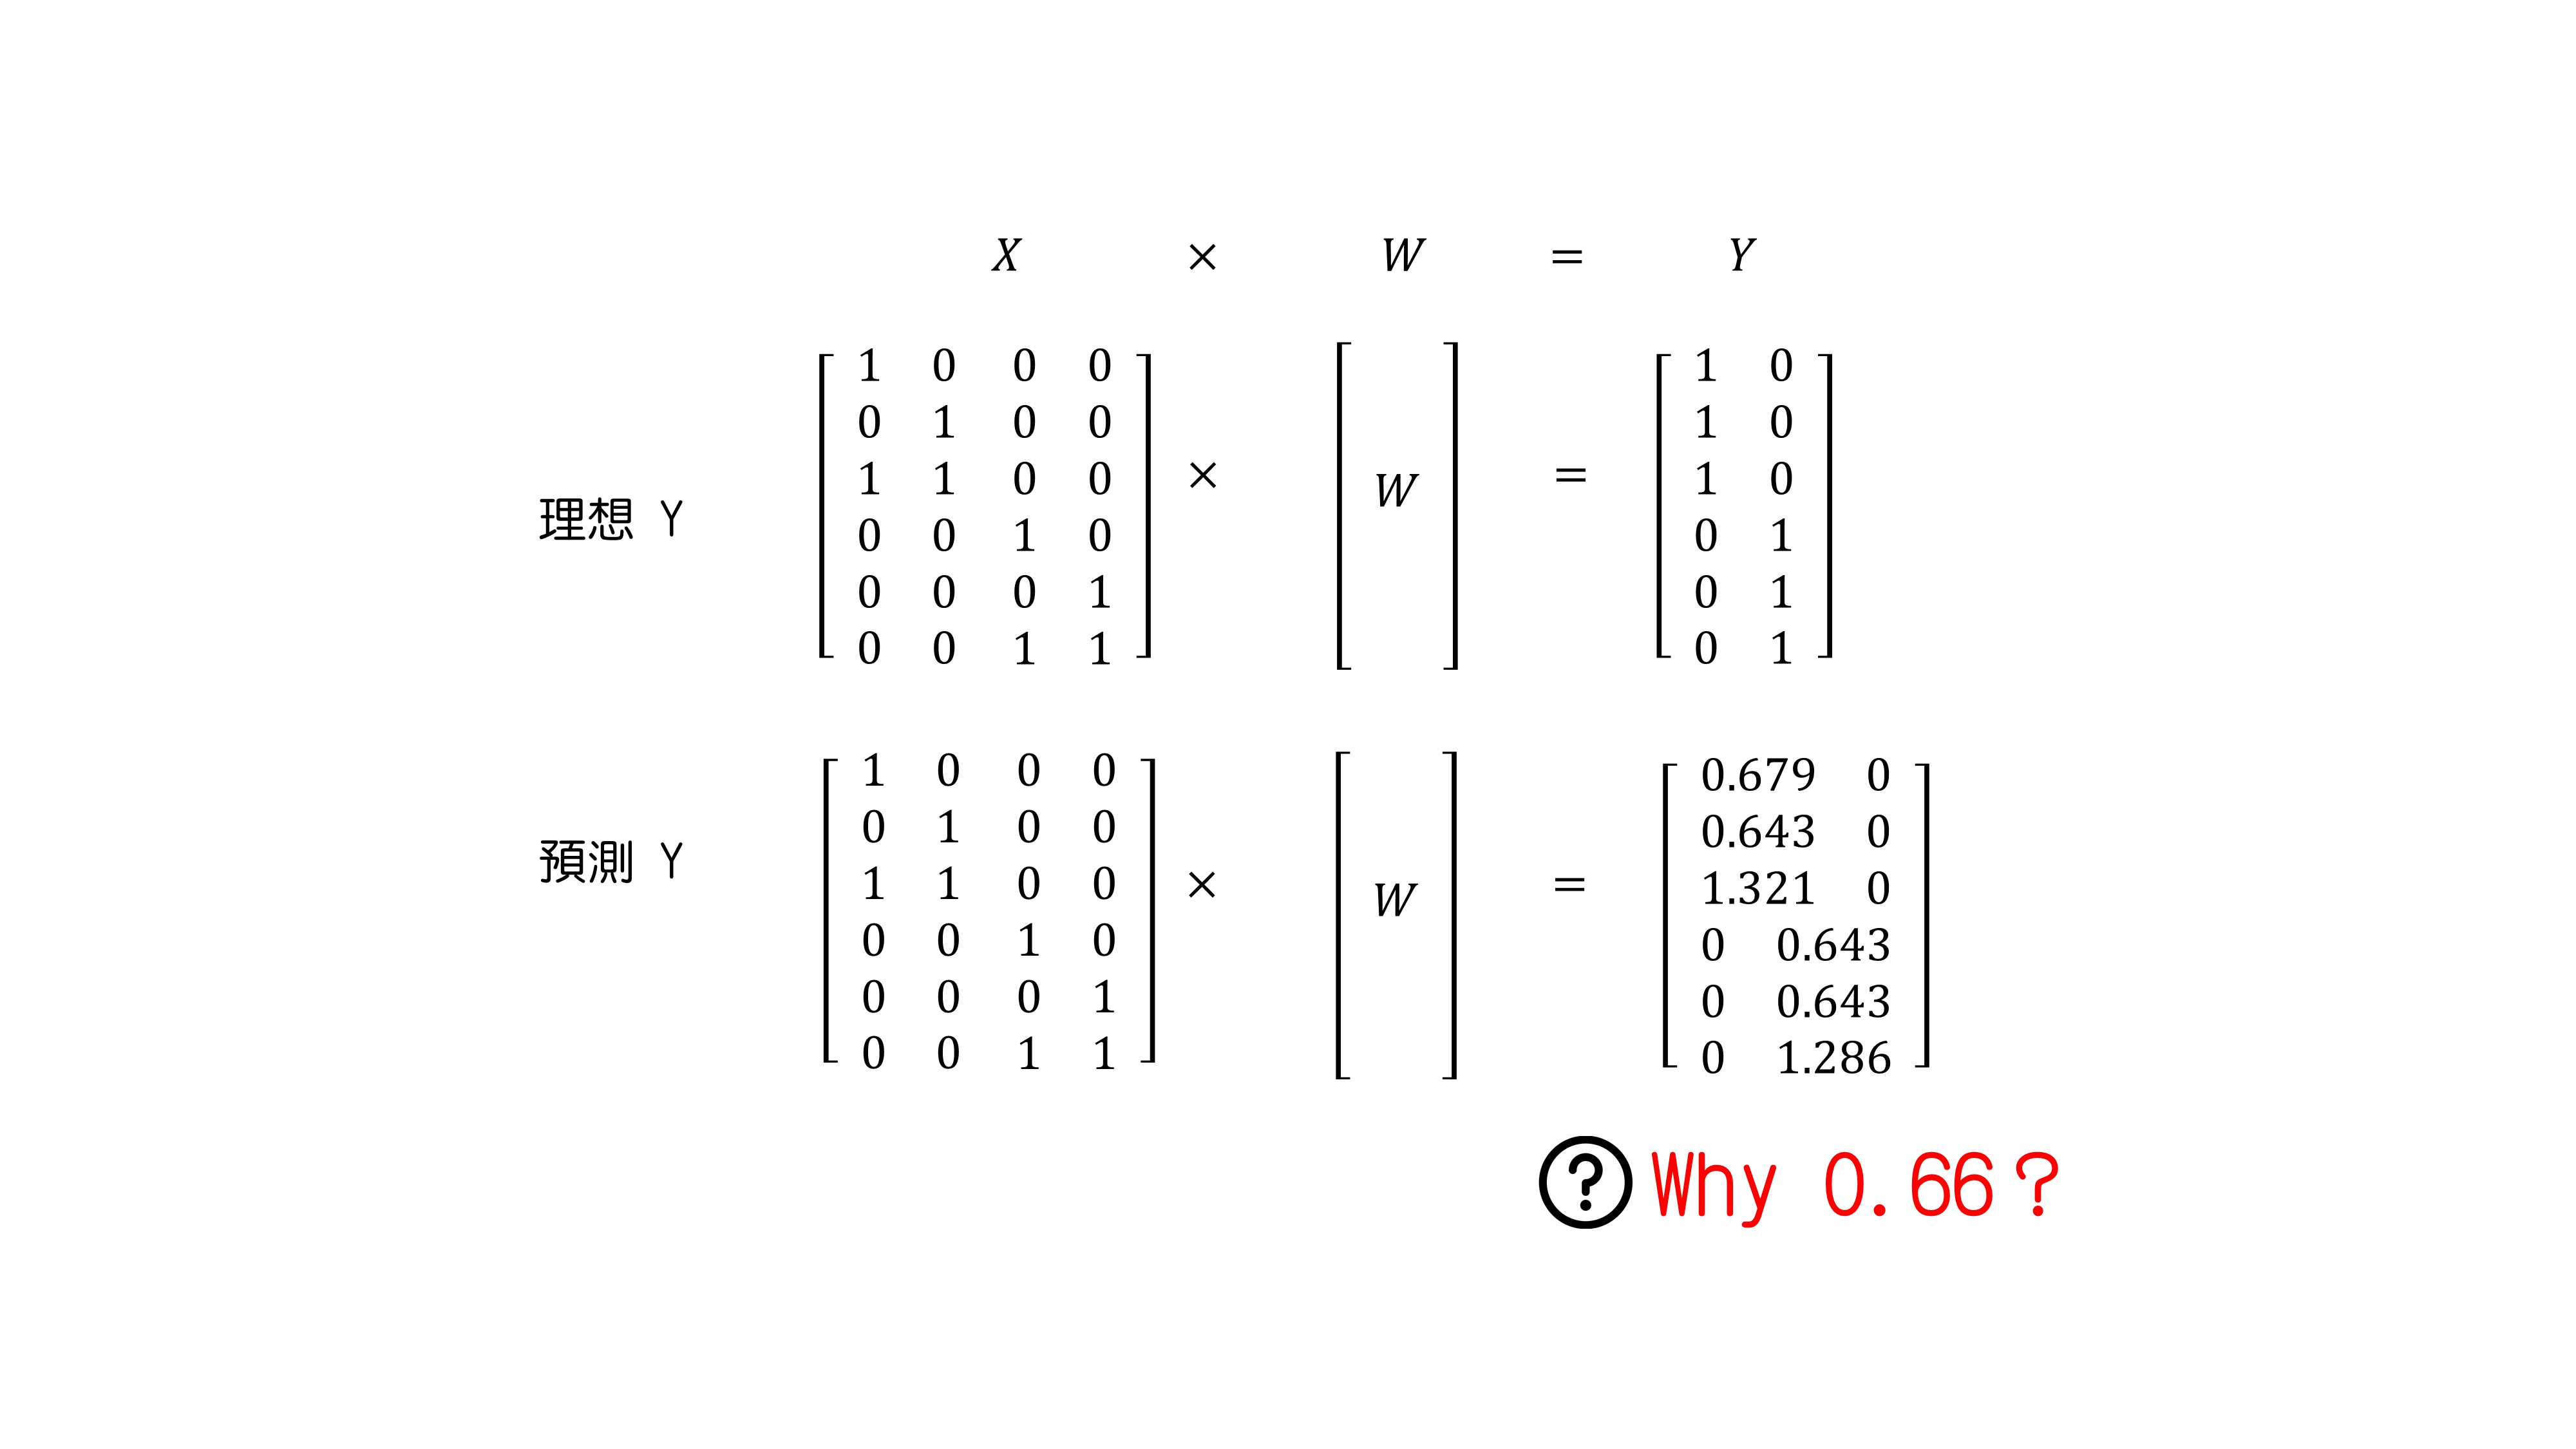

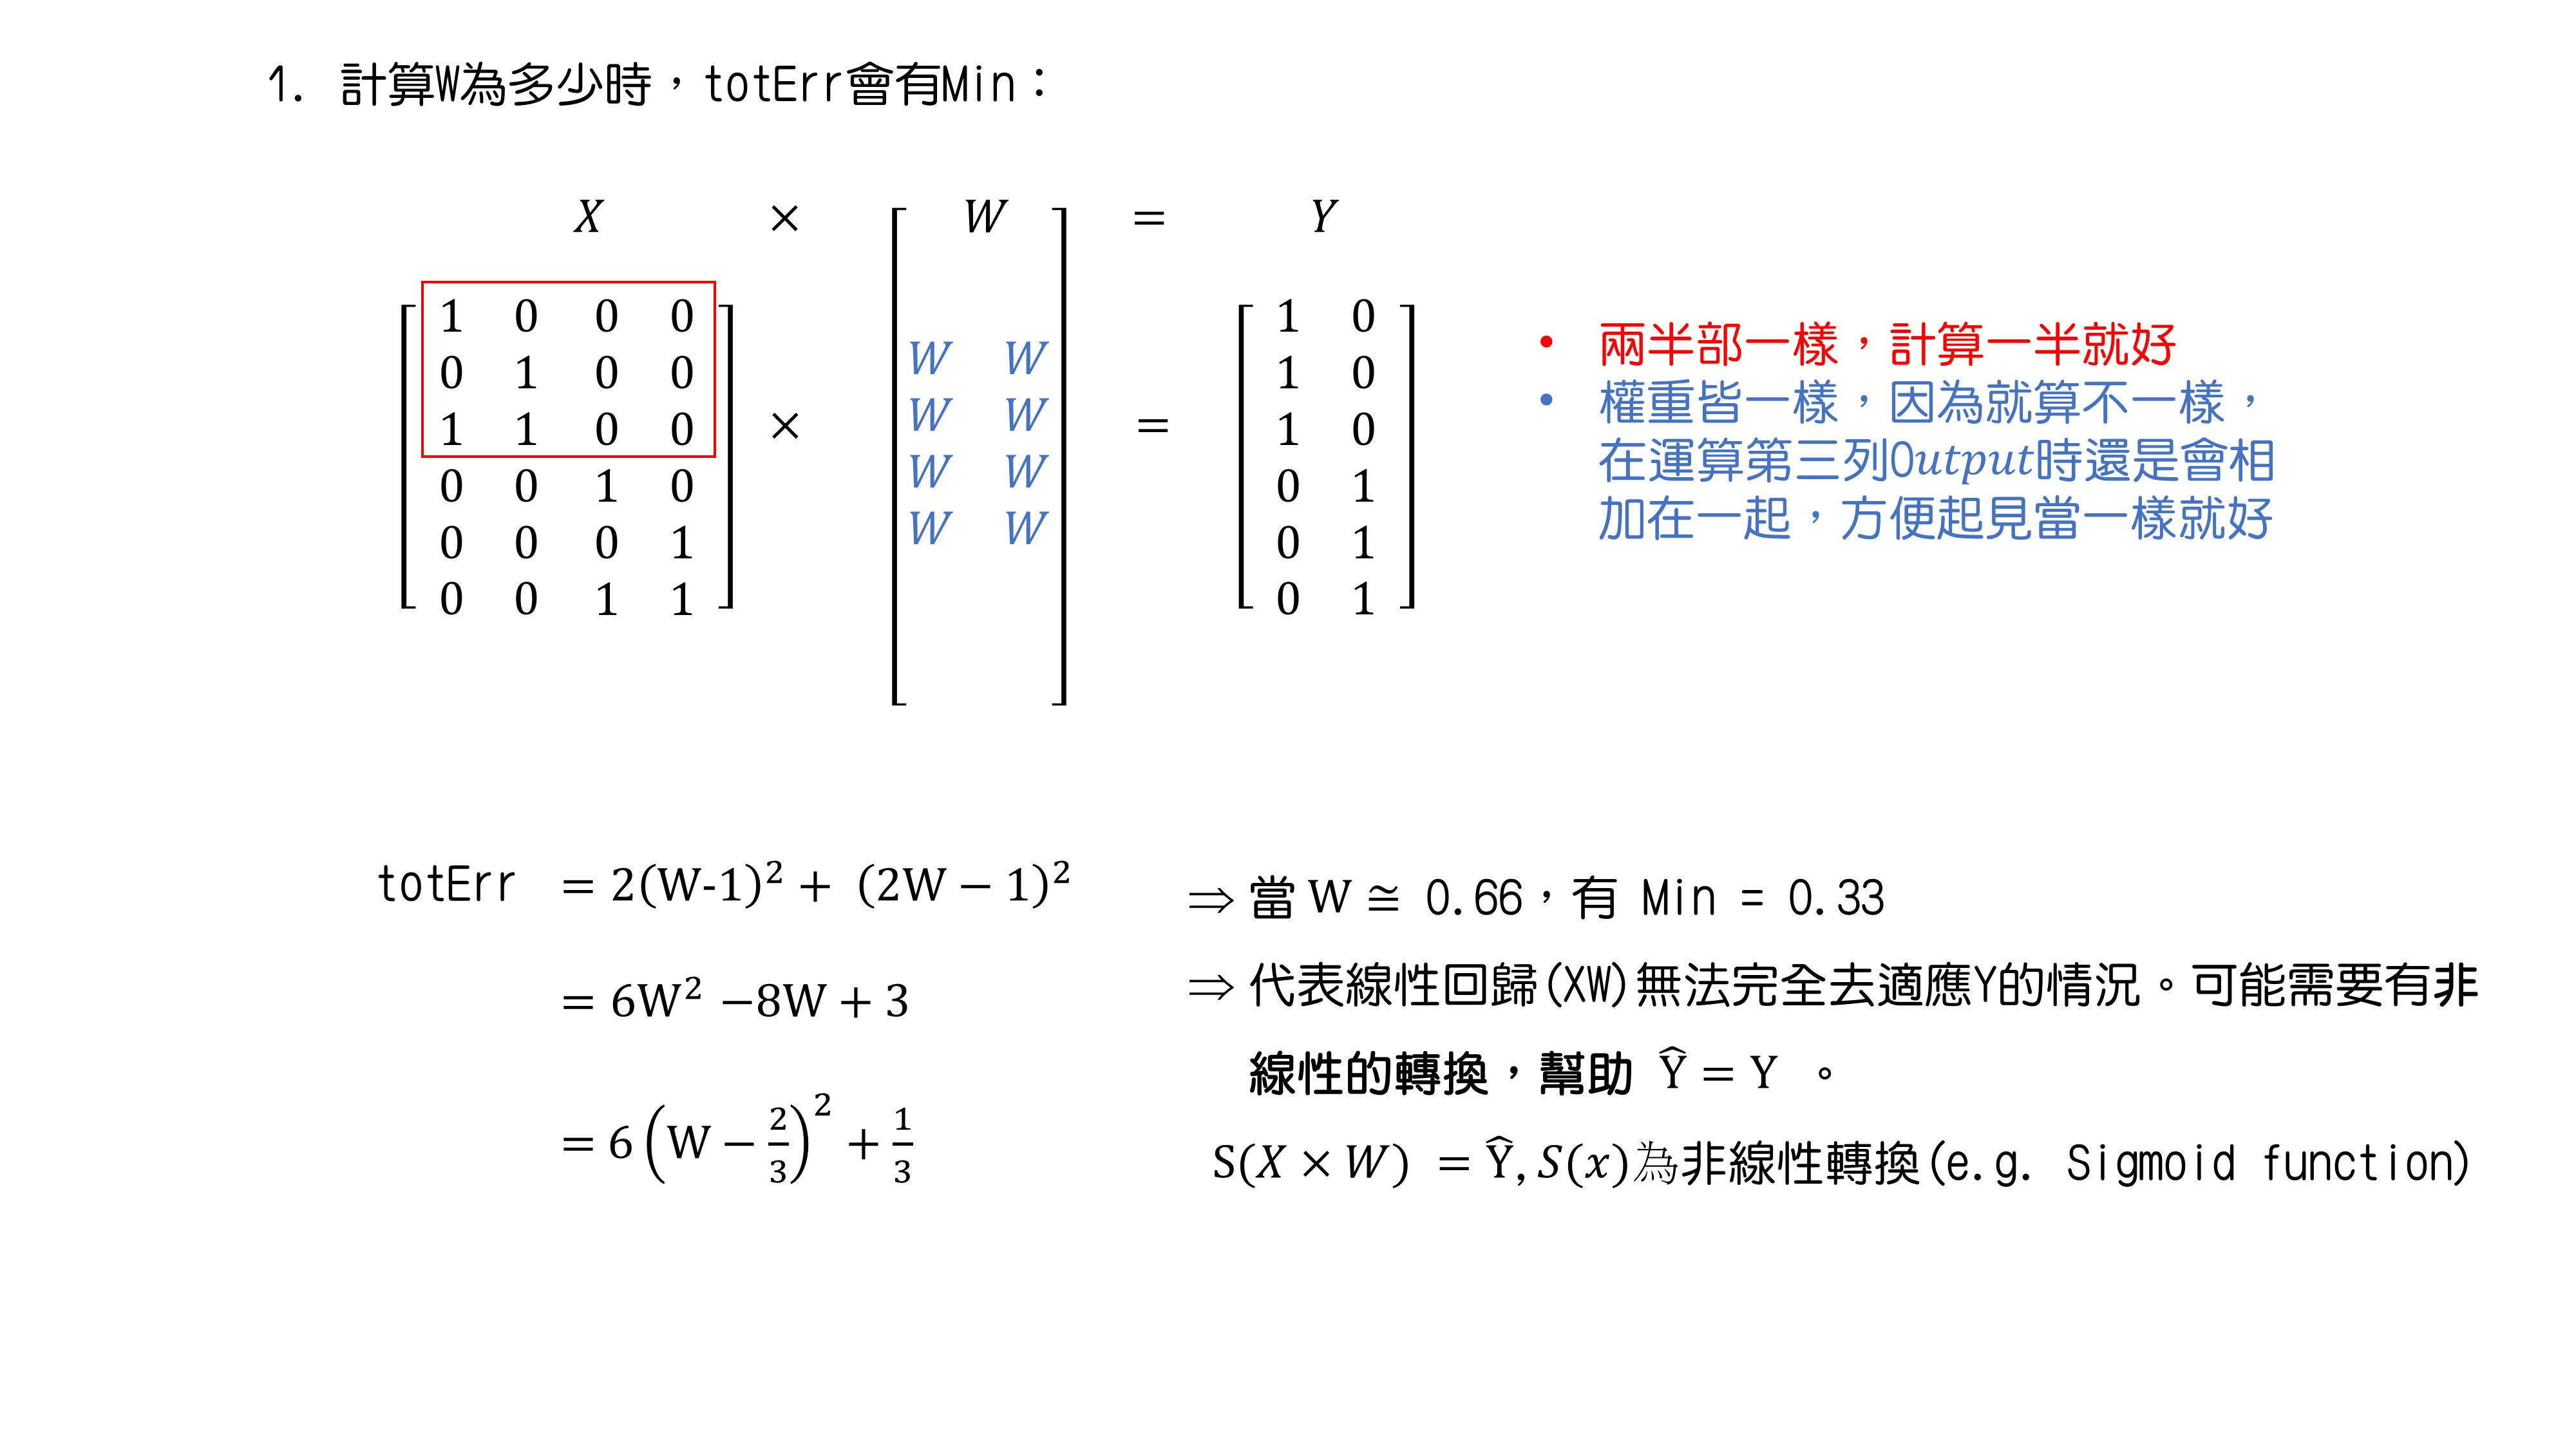

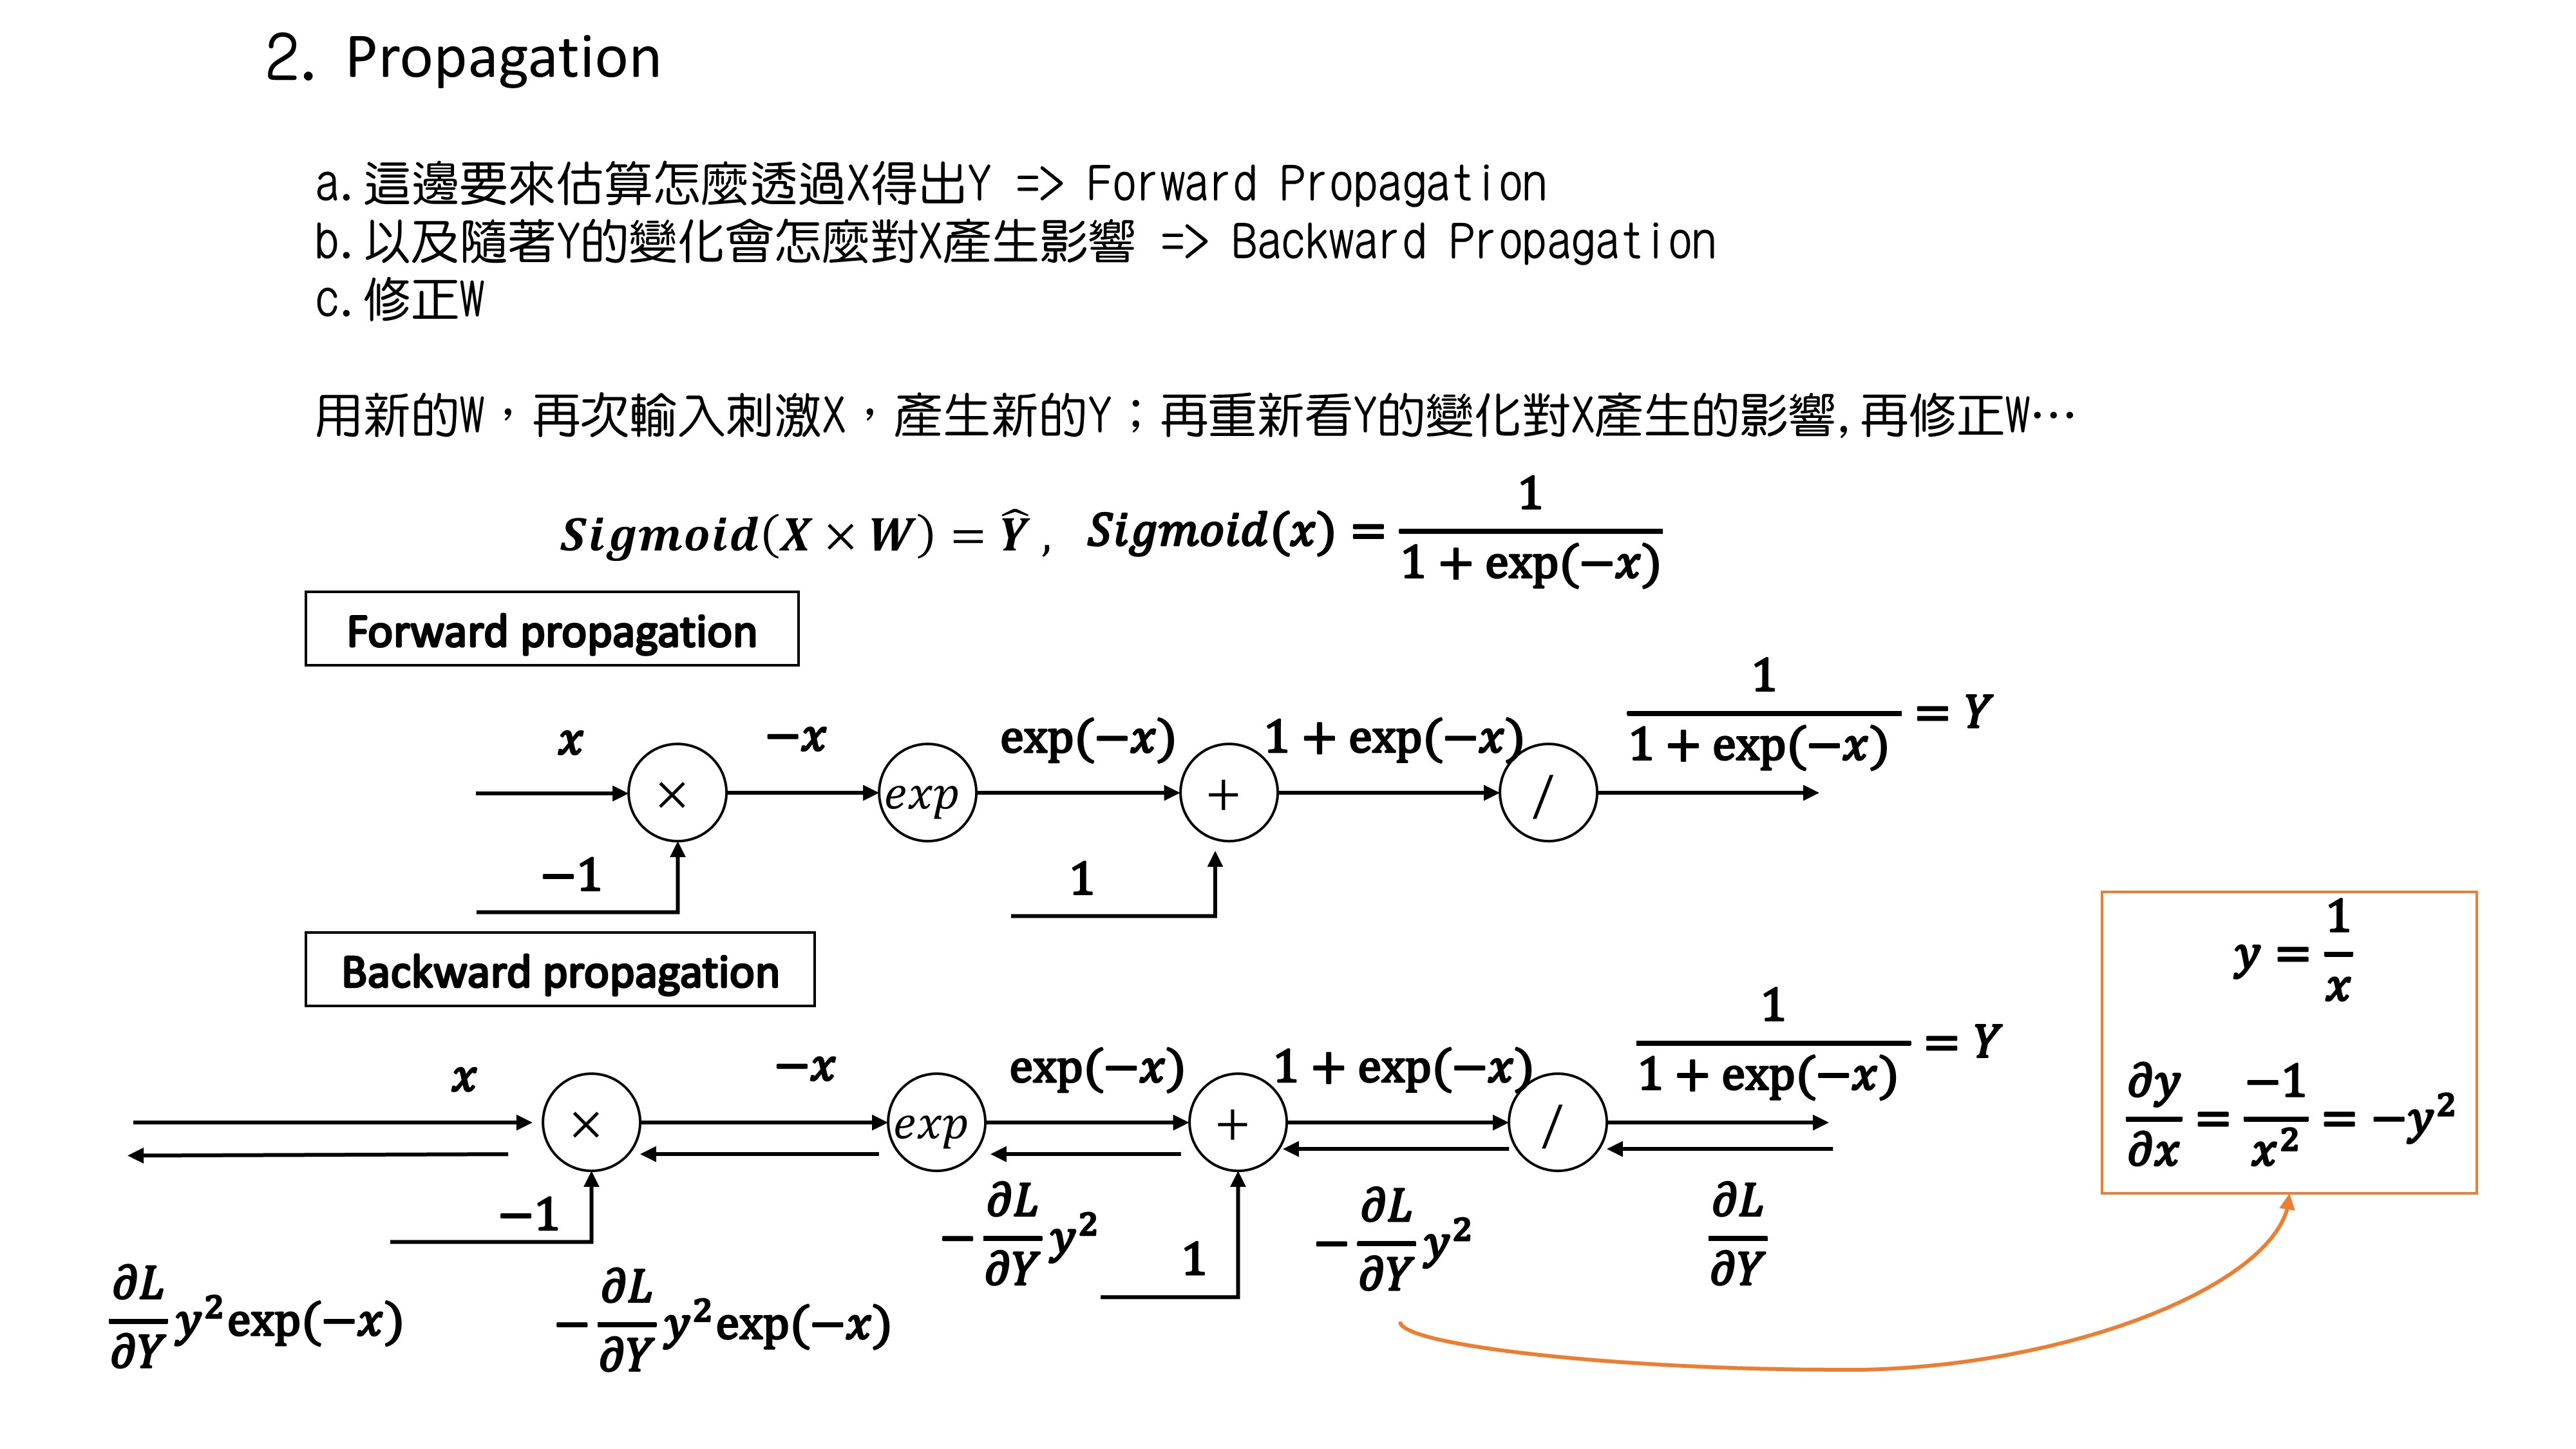

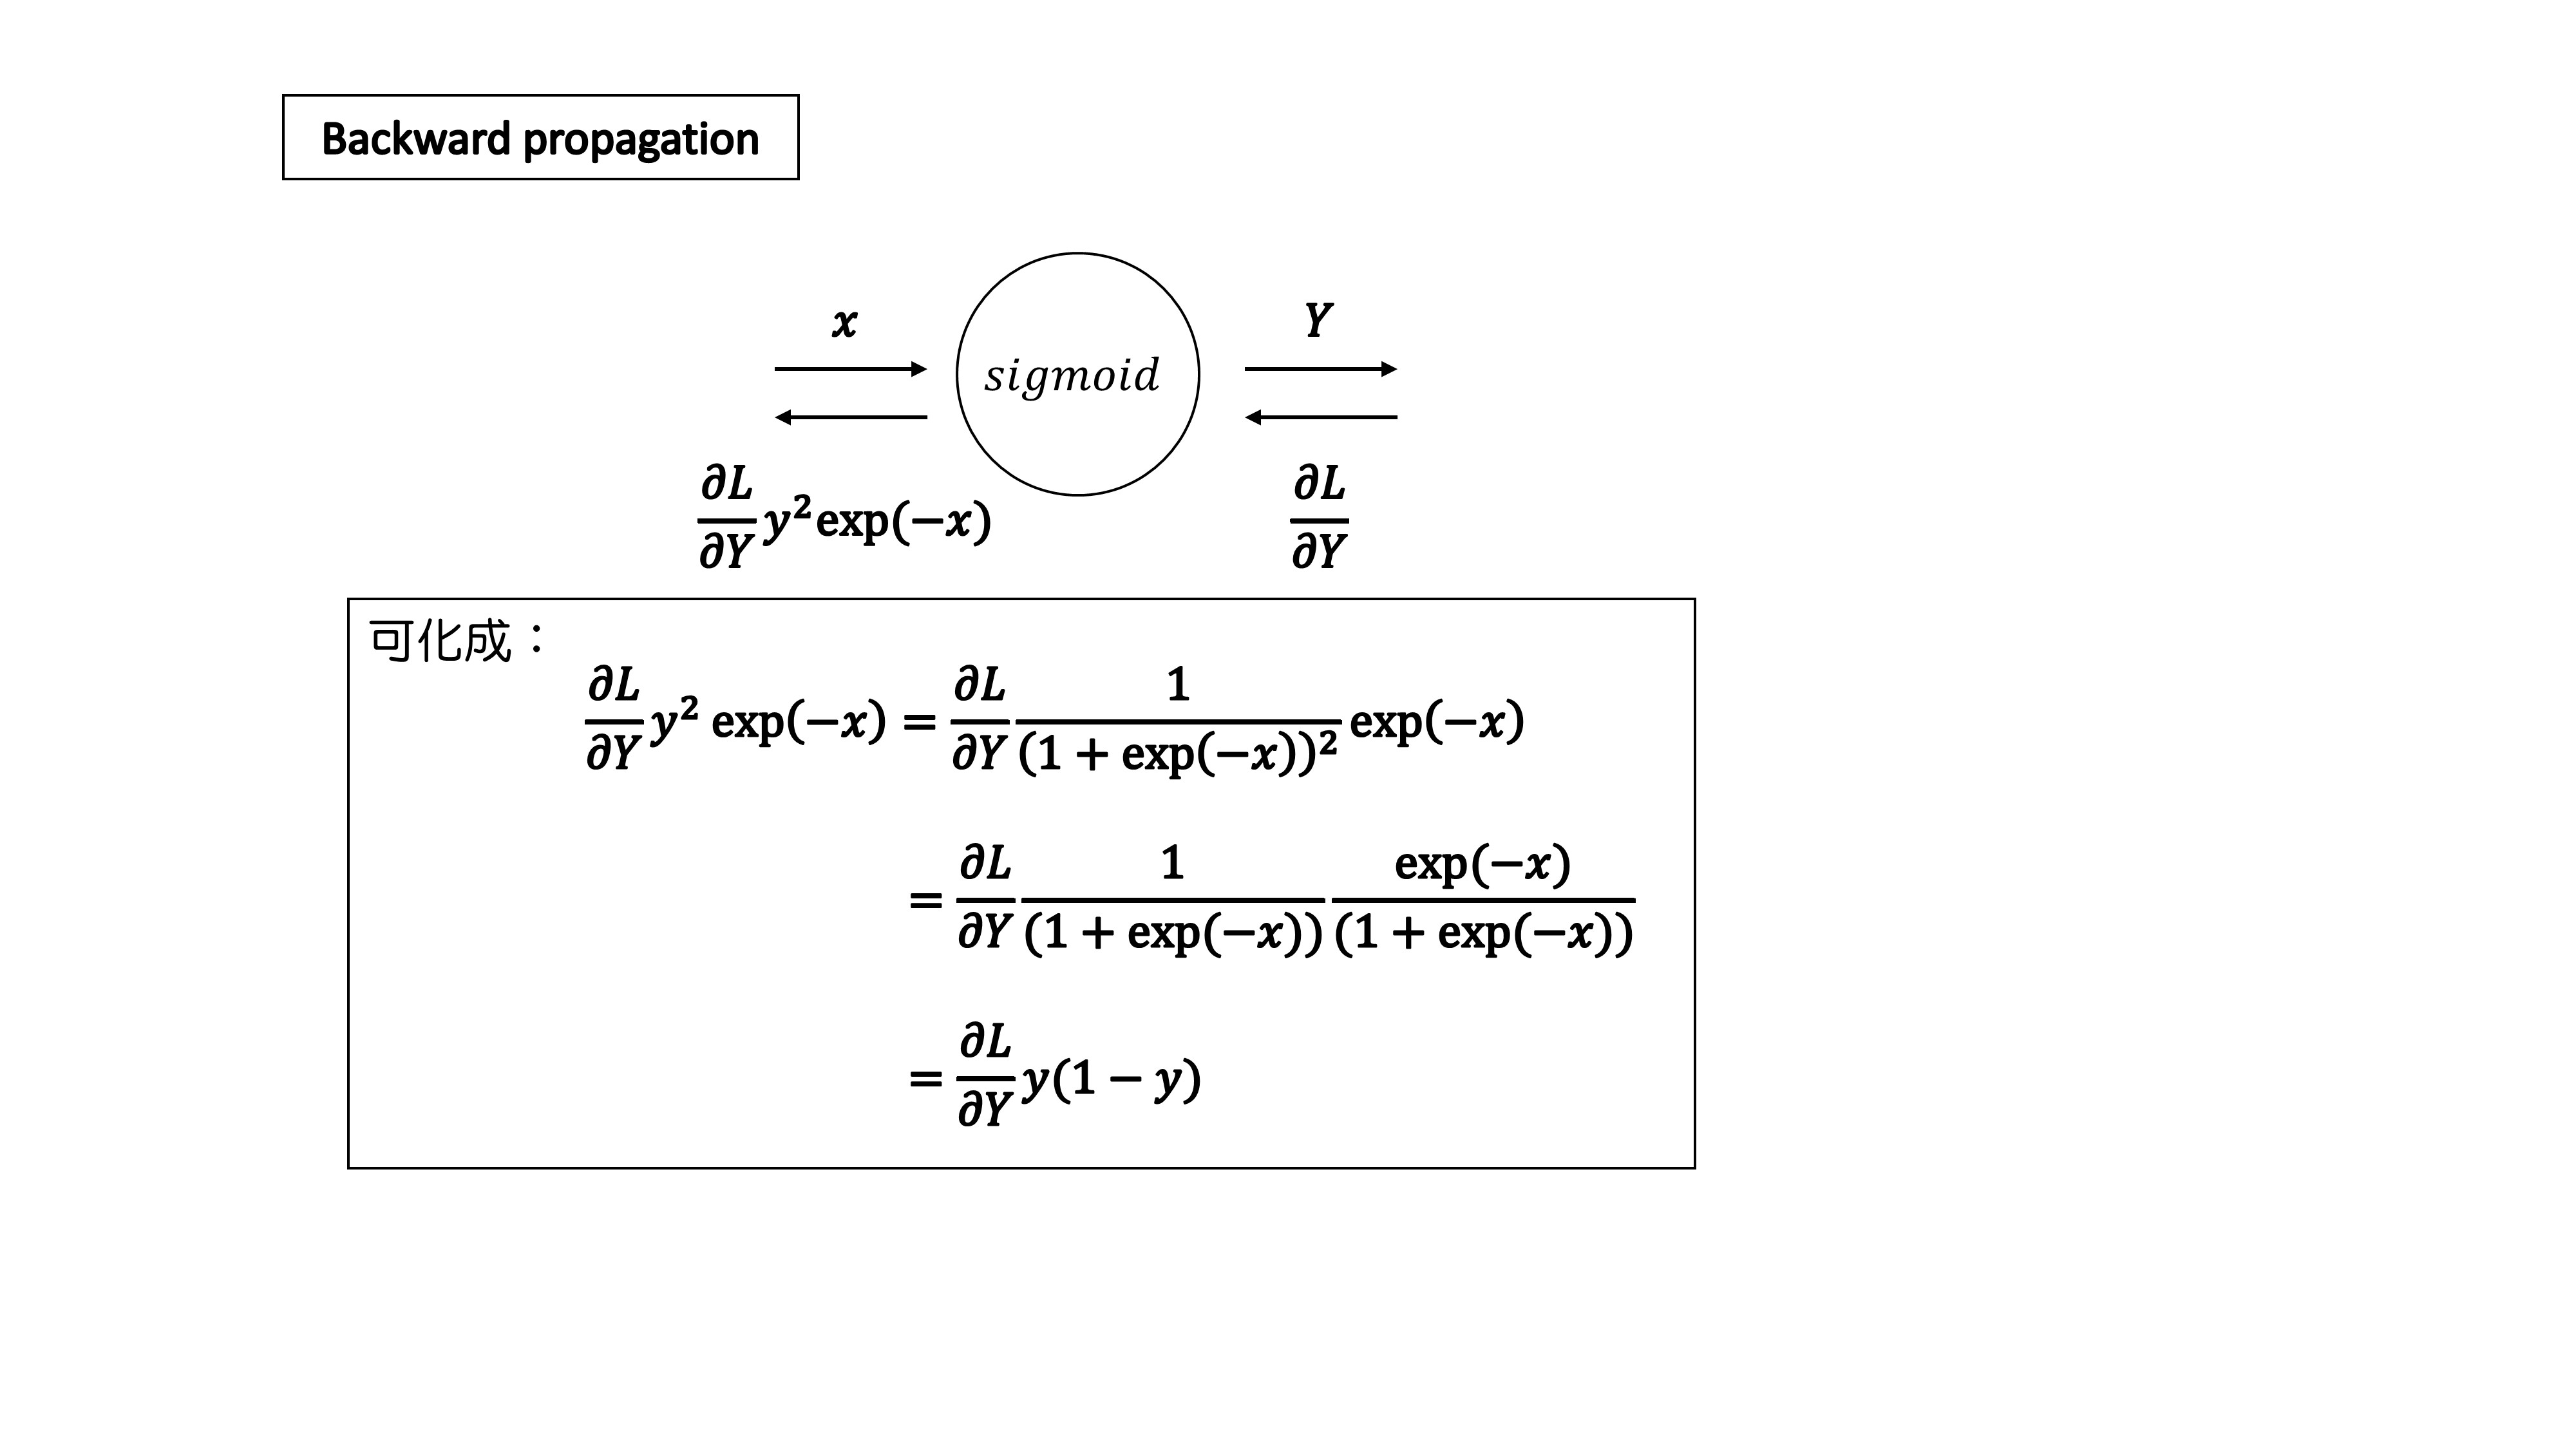

Ideal results:
[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Reality:
[[0.965 0.035]
 [0.965 0.035]
 [0.999 0.001]
 [0.035 0.965]
 [0.035 0.965]
 [0.001 0.999]]


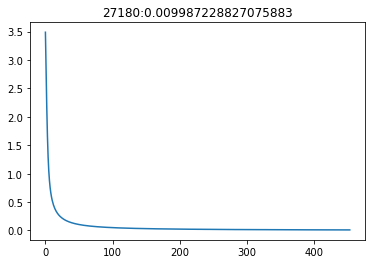

In [2]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x
def sigmoid(x):
    return 1/(1+exp(-x))

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Y=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions   Np = 6, Nx = 4
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions  Np = 6, Ny = 2
W=random.rand(Ny,Nx); # set initially random connectivity matrix

eta=.1; # set the learning rate 
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[] # history of totall error

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(Np); # choose a traing pattern at random
    
    # Forward propagation:
    y0=W.dot(X[p].T)
    y=sigmoid(y0) # activation function
    
    # Backward propagation:
    dy=multiply(y,1-y); # compute the derivative of the sigmoid function
    e=Y[p].T-y; # error e for the chosen input
    deltaW=eta*outer(multiply(e,dy),X[p])
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after 10 updates check total errors
        tmpY=W.dot(X.T) # testing ALL the training samples
        predY = sigmoid(tmpY)
        totErr=sum((Y.T-predY)**2) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol):
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print('Ideal results:')
print(Y)
print('Reality:')
print(predY.T) # predicted Y

In [3]:
W

array([[ 3.309,  3.309, -3.309, -3.304],
       [-3.303, -3.303,  3.306,  3.316]])

## 2 PyTorch (3 points)
Read <a href="https://www.pytorchtutorial.com/pytorch-for-numpy-users/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [6]:
# Instar learning:
x=array([0.1,0.3,0.6])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

[0.161 0.067 0.232] 0.13201423333366138
[0.15  0.108 0.296] 0.1753130228644712
[0.139 0.151 0.365] 0.22522235739624935
[0.128 0.192 0.43 ] 0.2780995315274002
[0.119 0.228 0.486] 0.3286859665942448
[0.112 0.255 0.528] 0.3718470465916044
[0.107 0.273 0.557] 0.4046264619648436
[0.104 0.285 0.576] 0.42703206074648453
[0.102 0.291 0.586] 0.4411104277844782
[0.101 0.295 0.592] 0.44944281506513273


In [14]:
### Write your PyTorch codes here
import torch as t
x = t.tensor([0.1, 0.3, 0.6])
W = t.tensor(random.rand(3))
for i in range(10): # trials 
    y=dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

tensor([0.5539, 0.2314, 0.5466], dtype=torch.float64) 0.4469304190324207
tensor([0.3484, 0.2625, 0.5708], dtype=torch.float64) 0.4527716284475124
tensor([0.2351, 0.2796, 0.5841], dtype=torch.float64) 0.456044446333668
tensor([0.1733, 0.2889, 0.5914], dtype=torch.float64) 0.45784837106070597
tensor([0.1396, 0.2940, 0.5953], dtype=torch.float64) 0.45883350737607226
tensor([0.1214, 0.2968, 0.5975], dtype=torch.float64) 0.45936874982394565
tensor([0.1116, 0.2983, 0.5986], dtype=torch.float64) 0.4596587429933555
tensor([0.1063, 0.2991, 0.5993], dtype=torch.float64) 0.45981562133573434
tensor([0.1034, 0.2995, 0.5996], dtype=torch.float64) 0.45990041810712884
tensor([0.1018, 0.2997, 0.5998], dtype=torch.float64) 0.45994623244567817
